In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv('diabetes.csv')

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.shape

(768, 9)

.

## Cleaning Data

In [37]:
df.isna().sum()          # df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

.

## Conversion of Data types

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
# Conversion (float -----> integer)
df['BMI'] = df['BMI'].astype(int)

In [42]:
# Conversion (float -----> integer)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


.

## Visualization Part

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

.

## 1. Numerical 


#### Box plot

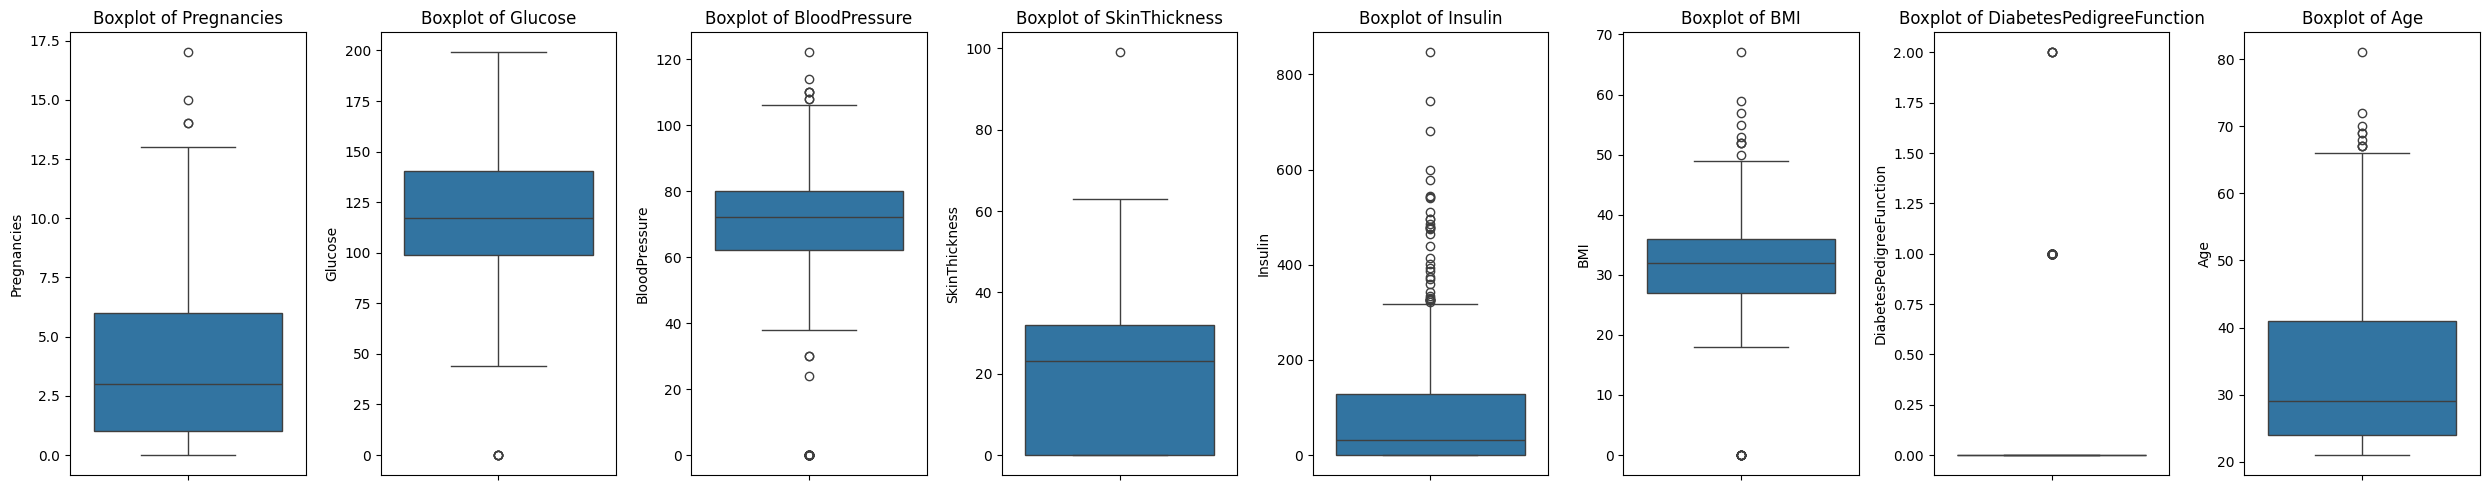

In [46]:
# Fisrt Half of columns to plot
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the figure
plt.figure(figsize=(25, 5))

# Loop through each column and create a boxplot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)  # Adjust the subplot layout
    sns.boxplot(df[col])                    # df[col].plot(kind='box')  .......using Matplotlib
    plt.title(f'Boxplot of {col}')

# Show the plots
plt.tight_layout()
plt.show()

#### Removing Outliers

In [47]:
# IQR, and cap the outliers.
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']  

# Create a copy of the DataFrame to preserve the original data
new_df = df.copy()

# Loop through each column
for col in columns:
    # Calculate the 25th and 75th percentiles
    percentile25 = new_df[col].quantile(0.25)
    percentile75 = new_df[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = percentile75 - percentile25

    # Calculate the upper and lower limits for outliers
    uplimit = percentile75 + 1.5 * iqr
    lolimit = percentile25 - 1.5 * iqr

    # Capping the outliers for the column
    new_df[col] = np.where(
        new_df[col] > uplimit, uplimit,
        np.where(new_df[col] < lolimit, lolimit, new_df[col])
    )

# Display the first few rows of the modified DataFrame to check the changes
print(new_df.head())
df = new_df.copy()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.0   
1          1.0     85.0           66.0           29.0      0.0  26.0   
2          8.0    183.0           64.0            0.0      0.0  23.0   
3          1.0     89.0           66.0           23.0     94.0  28.0   
4          0.0    137.0           40.0           35.0    168.0  43.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                       0.0  50.0        1  
1                       0.0  31.0        0  
2                       0.0  32.0        1  
3                       0.0  21.0        0  
4                       0.0  33.0        1  


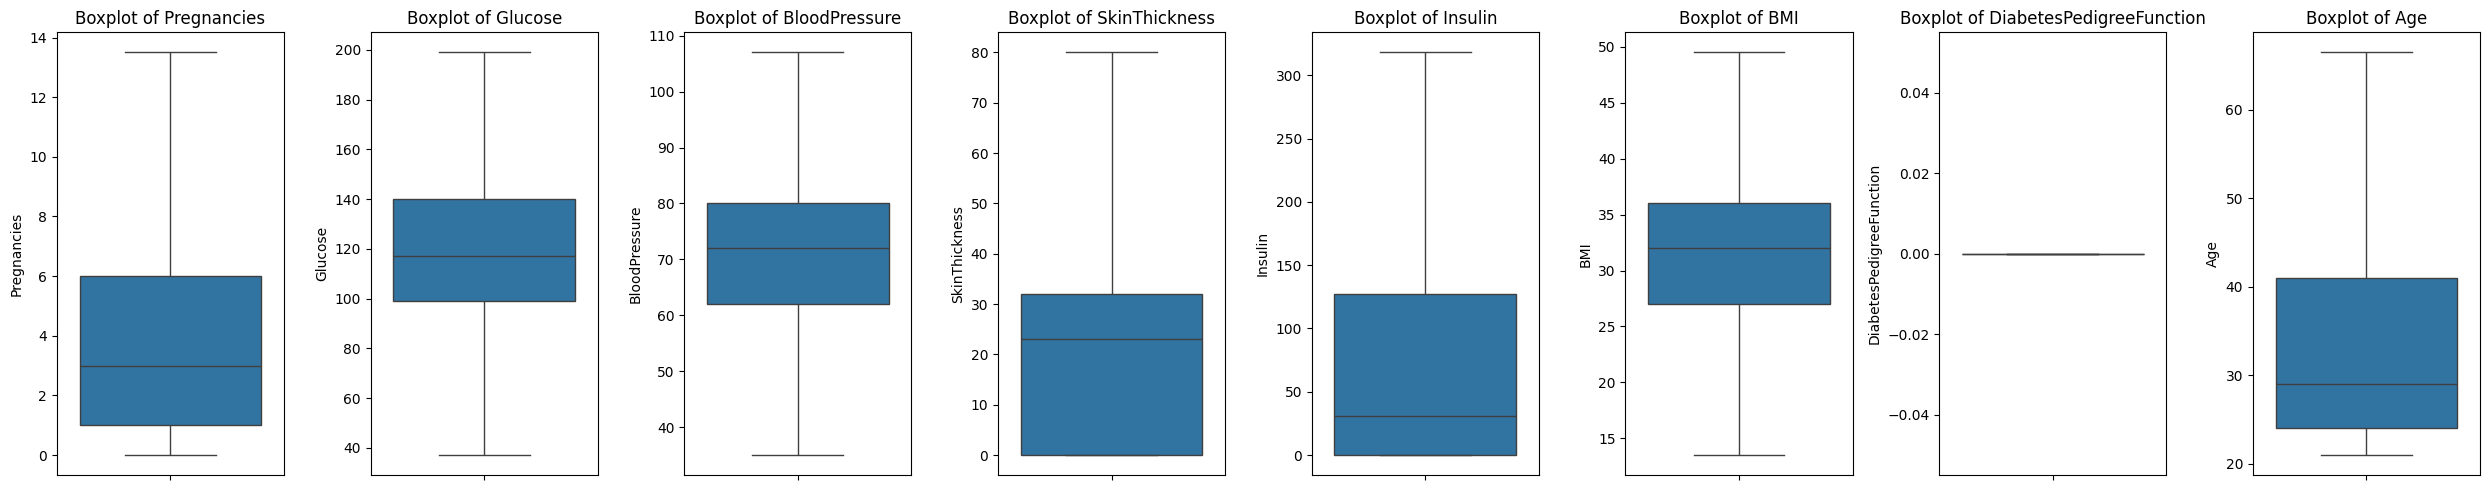

In [48]:
# Fisrt Half of columns to plot
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the figure
plt.figure(figsize=(25, 5))

# Loop through each column and create a boxplot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)  # Adjust the subplot layout
    sns.boxplot(df[col])                    # df[col].plot(kind='box')  .......using Matplotlib
    plt.title(f'Boxplot of {col}')

# Show the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

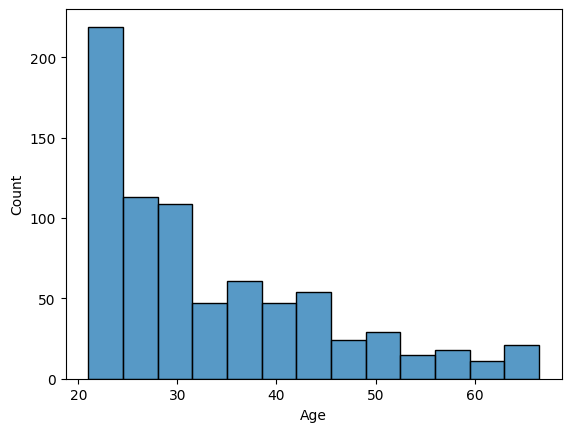

In [49]:
sns.histplot(data=df, x='Age')

<Axes: xlabel='BloodPressure', ylabel='Count'>

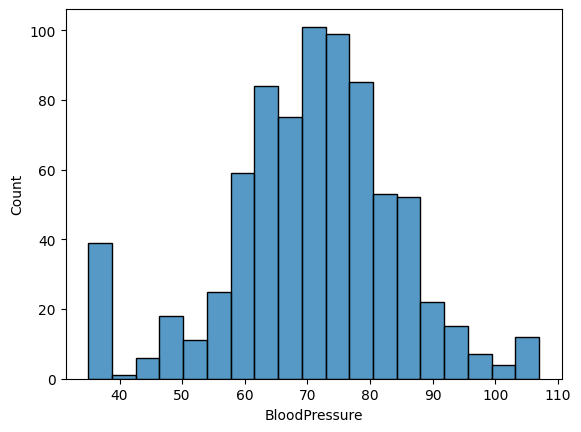

In [50]:
sns.histplot(data=df, x='BloodPressure')

<Axes: xlabel='Pregnancies', ylabel='Count'>

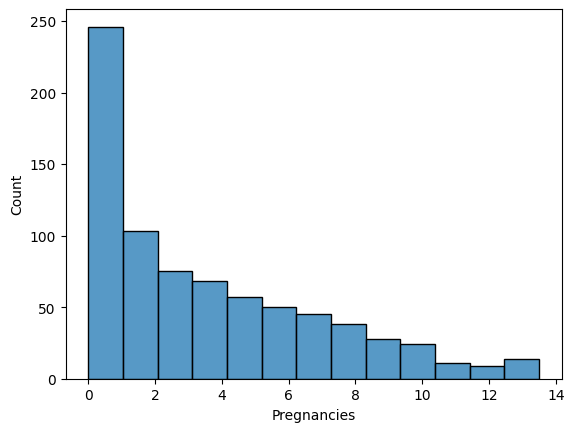

In [51]:
sns.histplot(data=df, x='Pregnancies')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [53]:
# float ---> Integer
columns_to_convert = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']  

for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


.

## Categorical

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,0,33,1


<Axes: xlabel='Outcome', ylabel='count'>

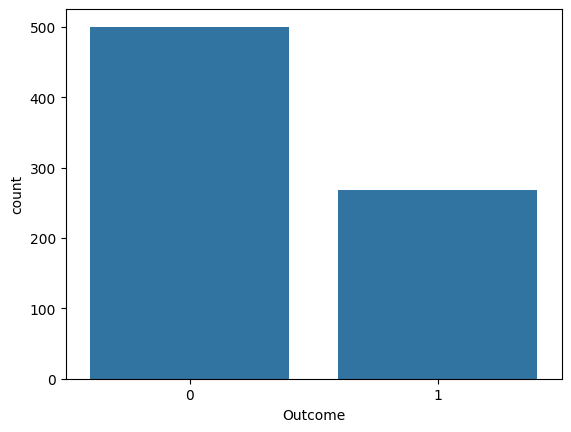

In [56]:
sns.countplot(data=df,  x='Outcome') 

<Axes: ylabel='count'>

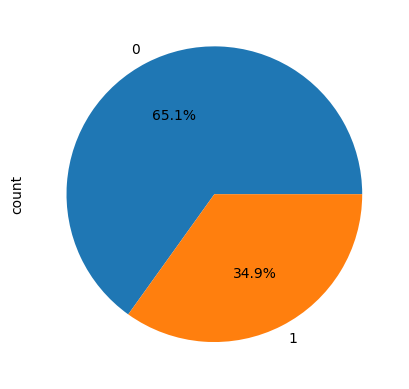

In [57]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%') 

<Axes: xlabel='Outcome', ylabel='Density'>

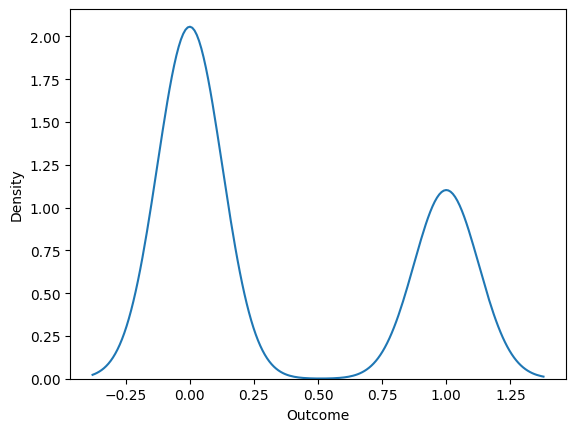

In [58]:
sns.kdeplot(data=df,  x='Outcome' ) 

.

## Numerical + Numerical

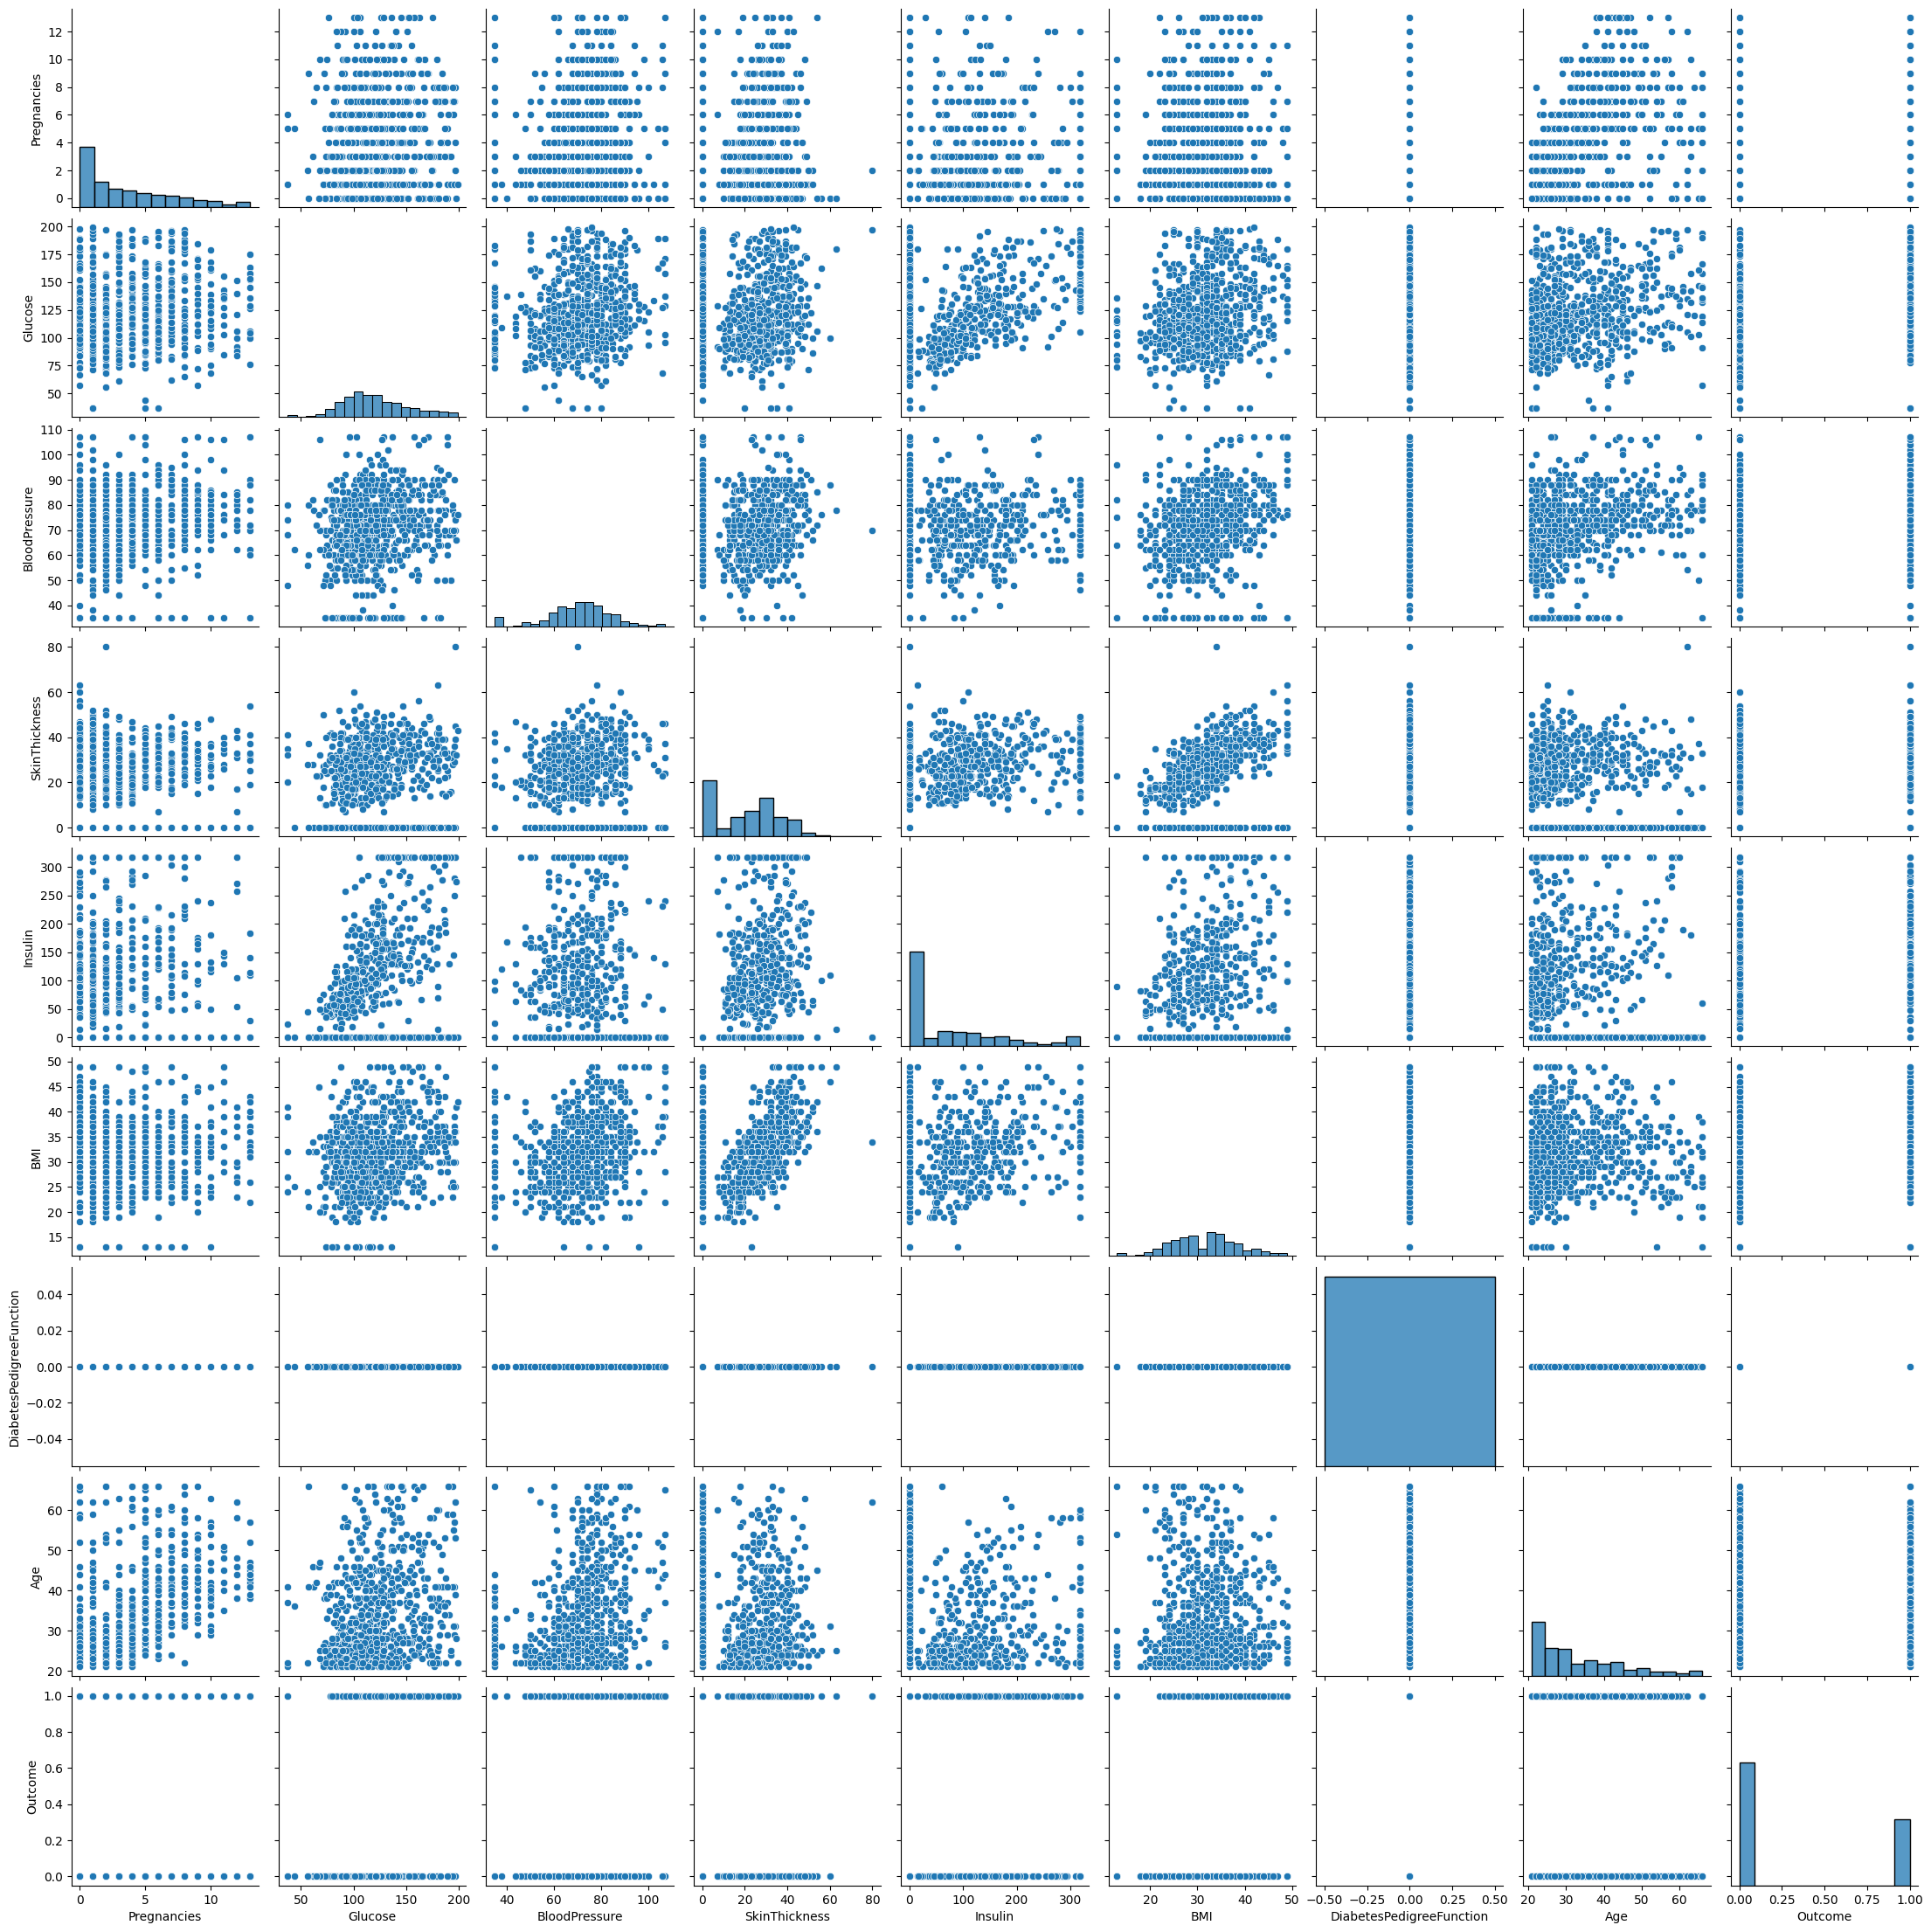

In [59]:
sns.pairplot(df) 

.

## Categorical + Numerical

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,0,33,1


<Axes: xlabel='Outcome', ylabel='Glucose'>

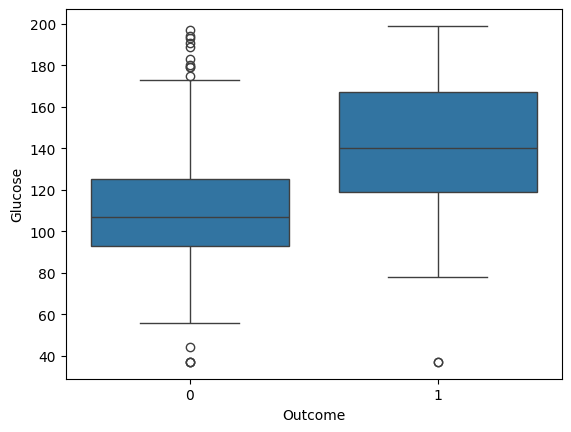

In [69]:
sns.boxplot(data=df, x='Outcome', y='Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

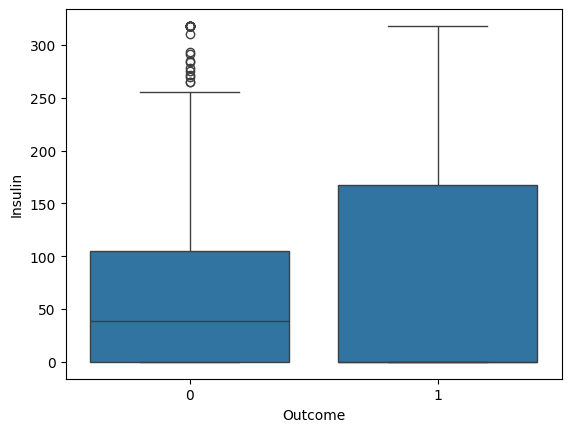

In [72]:
sns.boxplot(data=df, x='Outcome', y='Insulin')

<Axes: xlabel='Outcome', ylabel='BMI'>

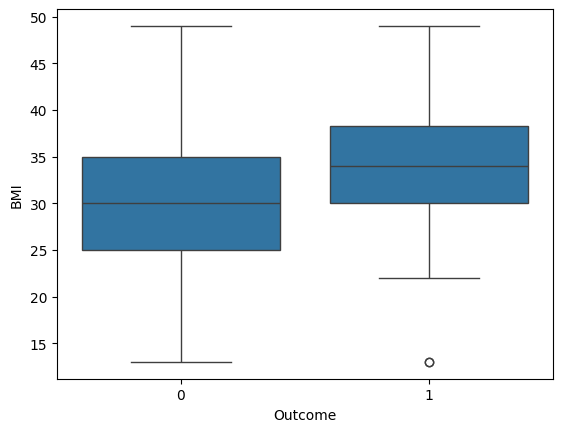

In [73]:
sns.boxplot(data=df, x='Outcome', y='BMI')

<Axes: xlabel='Outcome', ylabel='Age'>

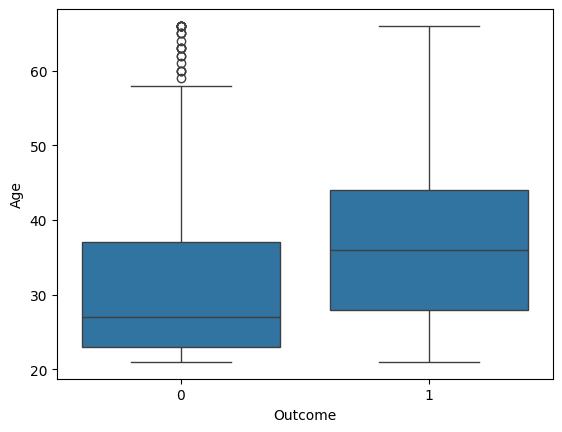

In [ ]:
sns.boxplot(data=df, x='Outcome', y='Age') 

.

.

##### **Conclusion**
if Glucose, Insulin, BMI ...... is high, then the person is Diabetic

After that we see on other features like 'Age'............if person is older, then chances of Diabetes is higher

.

.

## ML Part

###### **-Common Part:** Data preparation, splitting, preprocessing, and feature transformations.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

# Prepare the data
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), numerical_features)
    ]
)


### 1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
logistic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = logistic_pipeline.predict(X_test)

# Calculate and display metrics
print("Logistic Regression:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("  Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression:
  Accuracy: 0.72
  Confusion Matrix:
[[77 22]
 [21 34]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



## 2. Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the model
tree_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = tree_pipeline.predict(X_test)

# Calculate and display metrics
print("Decision Tree Classifier:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("  Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Classifier:
  Accuracy: 0.70
  Confusion Matrix:
[[70 29]
 [17 38]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.57      0.69      0.62        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



## 3. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Fit the model
forest_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = forest_pipeline.predict(X_test)

# Calculate and display metrics
print("Random Forest Classifier:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("  Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classifier:
  Accuracy: 0.76
  Confusion Matrix:
[[82 17]
 [20 35]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



## 4. KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Set the number of neighbors (k)
])

# Fit the model
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Calculate and display metrics
print("K-Nearest Neighbors Classifier:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("  Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classifier:
  Accuracy: 0.75
  Confusion Matrix:
[[81 18]
 [20 35]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



.

.

# Web Application Part

In [65]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(forest_pipeline, file)

In [66]:
with open('dataframe.pkl', 'wb') as df_file:
    pickle.dump(df, df_file)